![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-04 </span><h2>
</div>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:blue"> 1. K-Nearest Neighbors (KNN) </span></h1>
</div>

**k-Nearest Neighbors (kNN)**  is a simple supervised machine learning algorithm which can be used for both classification and regression tasks. In this lab session, we will use it to classify breast cancer patients i.e. given a set of symptoms, we will predict whether the cancer is malignant or benign. 



In [ ]:
import numpy as np                 # linear algebra and numerical computing
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt    # for data visualization 
import seaborn as sns              # for data visualization
import os                          # for paths and operating system related commands

## 1.1 Download Breast Cancer Wisconsin (Diagnostic) Dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

--2022-09-15 11:01:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data’

breast-cancer-wisco 100%[===================>]  19.42K   126KB/s    in 0.2s    

2022-09-15 11:01:43 (126 KB/s) - ‘breast-cancer-wisconsin.data’ saved [19889/19889]



In [ ]:
cwd = os.getcwd()
print(f'Current Working Directory: {cwd}')

file_path = os.path.join(cwd,'breast-cancer-wisconsin.data')
print(f'Path of Data File: {file_path} \n')

df = pd.read_csv( file_path, header=None)
df

Current Working Directory: /content
Path of Data File: /content/breast-cancer-wisconsin.data 



,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## 1.2 Data Exploration

In [ ]:
# each column represents a feature of data. last column contains class labels (2: benign , 4: malignant)
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# 'Class' variable contains two class labels (2,4) :  2 stands for benign and 4 stands for malignant cancer.
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [ ]:
# we can replace labels with 0 (benign) and 1 (malignant).
df['Class'] = df['Class'].replace([2,4],[0,1])  # it replaces (2 with 0) & (4 with 1) in 'Class' column of dataframe

df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [ ]:
df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [ ]:
# check datatype of each column
df.dtypes

Id                              int64
Clump_thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
# Convert data type of 'Bare_Nuclei' column to numeric values
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.dtypes

Id                               int64
Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [ ]:
# separate the features (X) and target variables (y)
X = df.drop(['Id','Class'], axis=1) # 'Id' of patient is not useful. Therefore, we will drop it.

y = df['Class']

In [ ]:
# names of features in our final data 
for i, feature_name in enumerate(X.columns):
    print(i,feature_name)


0 Clump_thickness
1 Uniformity_Cell_Size
2 Uniformity_Cell_Shape
3 Marginal_Adhesion
4 Single_Epithelial_Cell_Size
5 Bare_Nuclei
6 Bland_Chromatin
7 Normal_Nucleoli
8 Mitoses


In [ ]:
# Columns of X may contain some missing values.
# Therefore, we impute (fill) the missing values with median of respective column.

for col in X.columns:
    col_median=X[col].median()
    X[col].fillna(col_median, inplace=True)

X


,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


## 1.3 Train and Test Split of Data

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test

print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('\n')
print('Shape of X_test  : ', X_test.shape )
print('Shape of y_test  : ', y_test.shape )

Shape of X_train :  (559, 9)
Shape of y_train :  (559,)


Shape of X_test  :  (140, 9)
Shape of y_test  :  (140,)


## 1.4 Feature Scaling
Assuming $\mathrm{x}_i\in\mathbb{R}^N$ is $i_{\text{th}}$ feature column and $N$ is the total number of samples. Standard feature scaling of $\mathrm{x}_i$ is done as follows:

$$\hat{\mathrm{x}}_i = (\mathrm{x}_i - \mu_i)/\sigma_i ~~,$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of $i_{\text{th}}$ feature column $\mathrm{x}_i$.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## 1.5 Apply kNN Algorithm

In [ ]:
# import KNeighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## 1.6 Inference

In [ ]:
# make predictions on test data
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
# check model accuracy on test data
from sklearn.metrics import accuracy_score

print('Overall Model Accuracy = {0:0.4f} %'. format(accuracy_score(y_test, y_pred)*100))

Overall Model Accuracy = 97.1429 %


In [ ]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n\n', cm)

print('\nTrue Positives(TP)  = ', cm[0,0])

print('\nTrue Negatives(TN)  = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix:

 [[83  2]
 [ 2 53]]

True Positives(TP)  =  83

True Negatives(TN)  =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [ ]:
# Classification report is another way to evaluate the classification model performance. 
# It displays the precision, recall, f1 and support scores for the model

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        85
           1       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



## 1.7 Analysis

**1.7(a) :** Run KNN on different values of `k` e.g. `k=[4,5,7,9,11]` and plot `k vs. f1-score` graph.

**1.7(b) :** Select best `k` from previous step, and run KNN by using a different distance metric. Plot `distance_metric vs. f1-score` graph. List of distance metrics includes `[EuclideanDistance, ManhattanDistance/CityBlockDistance, CosineDistance ChebyshevDistance, MinkowskiDistance, SEuclideanDistance, MahalanobisDistance]`. Please refer to distance related documentation [here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html). 

**1.7(c) :** Please write your observations by analysing the results obtained from **1.7(a)** and **1.7(b)** .



<br>

## 1.8 Implement KNN from Scratch
In this task, you are required to implement KNN from scratch.   
Train and test the KNN model using 


In [ ]:
from scipy.spatial import distance_matrix

class KNN_New():
    def __init__(self, n_neighbors=None):
        # number of nearest neighbors
        self.k = n_neighbors      

    def fit(self, X_train, y_train):

        # just store the input data in attributes of this class
        self.X_train = ??
        self.y_train = ??

        self.N  = X_train.shape[0]  # number of samples in train dataset, X_train
        self.d  = X_train.shape[1]  # number of features in each sample

        print('KNN: Fitting the model to train data...\nYour train data has been registered.')

    def predict(self, X_test):
        print('KNN: Testing the model on test data ...')
        print('Distance Metric = euclidean')

        self.M = ??                # number of samples in test dataset, X_test
                                   # there are N rows in X_train matrix and M rows in X_test matrix


        # get pair-wise euclidean distance of each row-vector in X_test and X_train
        # e.g. first row of 'dist_matrix' = [ dist(X_test_0, X_train_0) ,  dist(X_test_0, X_train_1) , ... ,   dist(X_test_0, X_train_N)]
        # where dist() is a distance function and X_test_i represents i_th row of X_test matrix. 

        dist_matrix =  ??   # shape of output = [M,N] , hint: use distance_matrix() from scipy.spatial package


        sort_args_matrix  = ??      # return the indices of sorted rows of dist_matrix (sorting by default is done in ascending order). Hint: np.argsort() function 
        knn_idxs          = ??      # select the indices corresponding to k smallest values in each row of dist_matrix (by using 'sort_args_matrix'). shape: [M,k]

        knn_labels        = ??      # get labels of k nearest neighbors of each sample in X_test (by using knn_idxs).  shape: [M,k]

        y_test_hat = np.zeros(self.M, dtype='int64')     # predicted labels

        # predict labels one by one
        for i in range(self.M):
            # get most frequent label from the labels of the k-nearest neighbors of i_th test sample
            y_test_hat[i] = ??   # Hint: np.bincount(??).argmax()

        return y_test_hat


In [ ]:
# instantiate the model
knn_new = KNN_New(n_neighbors=3)


# fit the model to the training set
knn_new.fit(X_train, y_train)

KNN: Fitting the model to train data...
Your train data has been registered.


In [ ]:
y_pred_new = knn_new.predict(X_test)
y_pred_new

KNN: Testing the model on test data ...
Distance Metric = euclidean


array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        85
           1       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140





---



---


---



---




<div class="alert alert-block alert-warning">
<h1><span style="color:blue"> 2. Naive Bayes Classifier  </span></h1>
</div>

Naive Bayes classifier is a type of "probabilistic model" that uses conditional independence of feature variables given class label and applies Bayes' theorem to calculate posterior distribution. Depending upon the type of data and assumption on the probablity distribution, there are multiple variants of naive Bayes classifier such Gaussian, multi-nomial or Bernoulli naive Bayes classifiers. In this lab session, we will use **Multi-nomial Naive Bayes** classifier to detect that whether a text message is spam or not.

## 2.1 Load SMS-Spam-Collection Dataset

In [ ]:
#uncomment the following line to install plotly
# !pip install plotly

In [ ]:
import pandas as pd
import statistics as stats
import numpy as np
from collections import Counter
import re
import plotly.express as exp
import matplotlib.pyplot as plt
import seaborn as sns



dataset_df = pd.read_csv('https://dq-content.s3.amazonaws.com/433/SMSSpamCollection', sep='\t', header=None, names=['Type', 'SMS'])


print('Number of Samples(SMS) in Dataset = ', dataset_df.shape[0], '\n')

print('Number of Classes in Dataset      = ', len(dataset_df['Type'].unique()))
print('Names of  Classes in Dataset      = ', dataset_df['Type'].unique(), '\n')

print('Total Number of Non-Spam Messages = ', dataset_df['Type'].value_counts()[0])
print('Total Number of Spam Messages     = ', dataset_df['Type'].value_counts()[1], '\n')

print('Percentage of Non-Spam Messages   = ', round(dataset_df['Type'].value_counts(normalize=True)[0] * 100, 2), '%')
print('Percentage of Spam Messages       = ', round(dataset_df['Type'].value_counts(normalize=True)[1] * 100, 2), '%\n\n')


dataset_df.head()


Number of Samples(SMS) in Dataset =  5572 

Number of Classes in Dataset      =  2
Names of  Classes in Dataset      =  ['ham' 'spam'] 

Total Number of Non-Spam Messages =  4825
Total Number of Spam Messages     =  747 

Percentage of Non-Spam Messages   =  86.59 %
Percentage of Spam Messages       =  13.41 %




,Type,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



There are two classes in this dataset:  
'ham'  --> normal SMS  
'spam' --> spam SMS





## 2.2 Exploration of the Dataset

In [ ]:
dataset_df.isnull()

,Type,SMS
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
df = dataset_df.copy()
df.isnull().sum()

Type    0
SMS     0
dtype: int64

In [ ]:


# count the number of missing and duplicate samples
missing_info = df.isnull().sum()
print(f'Number of Missing Samples :\nType = {missing_info[0]} , SMS = {missing_info[1]}')
print('Number of Duplicate Samples = ', df.duplicated().sum() ,'\n\n') 

df= df.drop_duplicates()                               # drop duplicate samples

df['Type'] = df['Type'].replace(['ham','spam'],[0,1])  # replace 'ham' label with 0 and 'spam' label with 1
df['SMS']  = df['SMS'].str.lower()                     # change to lower-cased characters
df['SMS']  = df['SMS'].str.replace('[^\w\s]','')       # remove '[^\w\s]' from each message

df

Number of Missing Samples :
Type = 0 , SMS = 0
Number of Duplicate Samples =  403 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_la

,Type,SMS
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [ ]:
df['Type'].value_counts()

0    4516
1     653
Name: Type, dtype: int64

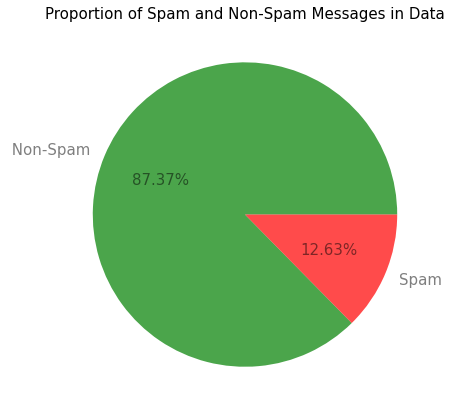

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(df['Type'].value_counts(),labels=[' Non-Spam','Spam'],autopct='%0.2f%%', textprops={'fontsize': 15, 'alpha':0.5}, colors=['green', 'red'], wedgeprops={'alpha':0.7}) # 
plt.title('Proportion of Spam and Non-Spam Messages in Data', fontsize=15)
plt.show()

We will explore some properties of the spam and non-spam messages before proceeding to data pre-processing. In particular, we will check the the number of characters, number of words and number of sentences in both types of messages.
<br><br>
#### (a) Number of Characters

In [ ]:
#uncomment the following line to install nltk
# !pip install nltk

In [ ]:
#natural language tool kit
import nltk
nltk.download('punkt') # Used for nltk.tokenize


df['Num_Chars']=df['SMS'].apply(len)
df.head()

,Type,SMS,Num_Chars
0,0,go until jurong point crazy available only in ...,102
1,0,ok lar joking wif u oni,23
2,1,free entry in 2 a wkly comp to win fa cup fina...,149
3,0,u dun say so early hor u c already then say,43
4,0,nah i dont think he goes to usf he lives aroun...,59


In [ ]:
len('ok lar joking wif u oni')

23

In [ ]:
def addRandomNumber(row):
  # return row
  if row == 0:
    return 0
  else:
    return 100

In [ ]:
df['Type'].apply(addRandomNumber)

0         0
1         0
2       100
3         0
4         0
       ... 
5567    100
5568      0
5569      0
5570      0
5571      0
Name: Type, Length: 5169, dtype: int64

#### (b) Number of Words

In [ ]:
from nltk.tokenize import word_tokenize
nltk.word_tokenize('ok lar joking wif u oni')

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

In [ ]:
def multiplyNumbers(a, b):
  return a*b

multiplyNumbers(5,6)

30

In [ ]:
y = lambda a, b : a * b
print(y(5, 6))

30


In [ ]:
y = lambda x: nltk.word_tokenize(x)
y('ok lar joking wif u oni')

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

In [ ]:
df['SMS'].apply(lambda x: nltk.word_tokenize(x))

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: SMS, Length: 5169, dtype: object

In [ ]:
def my_word_tokenize_function(row):
  return nltk.word_tokenize(row)

df['SMS'].apply(my_word_tokenize_function)

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: SMS, Length: 5169, dtype: object

In [ ]:
df['Num_Words']=df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Type,SMS,Num_Chars,Num_Words
0,0,go until jurong point crazy available only in ...,102,20
1,0,ok lar joking wif u oni,23,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28
3,0,u dun say so early hor u c already then say,43,11
4,0,nah i dont think he goes to usf he lives aroun...,59,13


#### (c) Number of Sentences

In [ ]:
nltk.sent_tokenize('Hello my name is Dumbledore I am a wizard')

['Hello my name is Dumbledore I am a wizard']

In [ ]:
df['Num_Sentns']=df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Type,SMS,Num_Chars,Num_Words,Num_Sentns
0,0,go until jurong point crazy available only in ...,102,20,1
1,0,ok lar joking wif u oni,23,6,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1
3,0,u dun say so early hor u c already then say,43,11,1
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1


#### Summary (Non-Spam Messages)

In [ ]:
df['Type']==0

0        True
1        True
2       False
3        True
4        True
        ...  
5567    False
5568     True
5569     True
5570     True
5571     True
Name: Type, Length: 5169, dtype: bool

In [ ]:
len(df)

5169

In [ ]:
df[df['Type']==0]

,Type,SMS,Num_Chars,Num_Words,Num_Sentns,Transformed_SMS
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1,nah dont think goe usf live around though
6,0,even my brother is not like to speak with me t...,75,16,1,even brother like speak treat like aid patent
...,...,...,...,...,...,...
5565,0,huh y lei,9,3,1,huh lei
5568,0,will ü b going to esplanade fr home,35,8,1,ü b go esplanad fr home
5569,0,pity was in mood for that soany other suggest...,50,9,1,piti mood soani suggest
5570,0,the guy did some bitching but i acted like id ...,124,26,1,guy bitch act like id interest buy someth els ...


In [ ]:
df[['Num_Chars','Num_Words']]

,Num_Chars,Num_Words
0,102,20
1,23,6
2,149,28
3,43,11
4,59,13
...,...,...
5567,151,30
5568,35,8
5569,50,9
5570,124,26


In [ ]:
df[[df['Type']==0]['Num_Chars','Num_Words','Num_Sentns']].describe()

,Num_Chars,Num_Words,Num_Sentns
count,4516.000000,4516.000000,4516.000000
mean,67.050930,14.059566,0.999557
std,53.934323,10.947241,0.021042
min,1.000000,0.000000,0.000000
25%,31.000000,7.000000,1.000000
50%,50.000000,11.000000,1.000000
75%,87.000000,18.000000,1.000000
max,888.000000,171.000000,1.000000


#### Summary (Spam Messages)

In [ ]:
df[df['Type']==1][['Num_Chars','Num_Words','Num_Sentns']].describe()

,Num_Chars,Num_Words,Num_Sentns
count,653.000000,653.000000,653.0
mean,131.646248,23.448698,1.0
std,28.654470,5.847700,0.0
min,12.000000,2.000000,1.0
25%,124.000000,21.000000,1.0
50%,142.000000,25.000000,1.0
75%,150.000000,27.000000,1.0
max,206.000000,34.000000,1.0


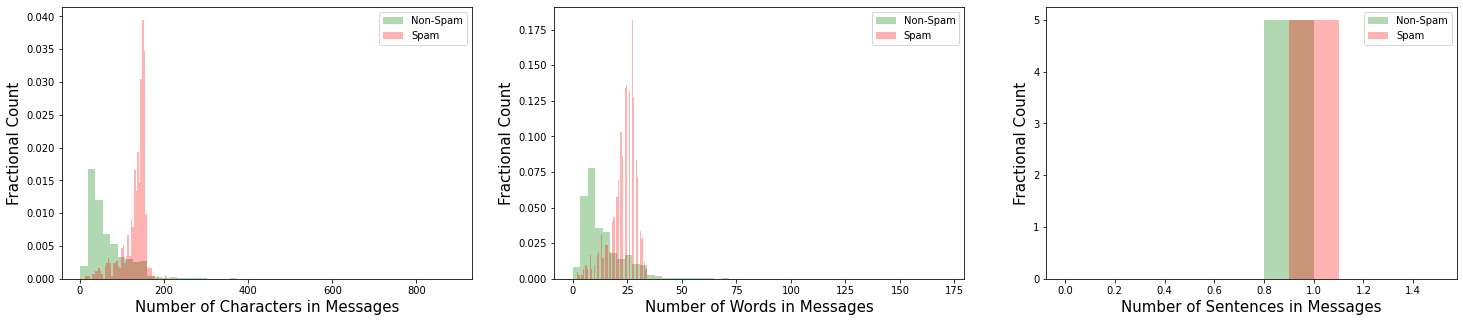

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots( 1,3 , figsize=(25,5) )

ax1.hist(df[df['Type']==0]['Num_Chars'],color='green', alpha=0.3, bins=50, label='Non-Spam', density=True)
ax1.hist(df[df['Type']==1]['Num_Chars'],color = 'red', alpha=0.3, bins=50, label='Spam', density=True)
ax1.set_xlabel('Number of Characters in Messages', fontsize=15)
ax1.set_ylabel('Fractional Count', fontsize=15)
ax1.legend()

ax2.hist(df[df['Type']==0]['Num_Words'],color='green', alpha=0.3, bins=50, label='Non-Spam', density=True)
ax2.hist(df[df['Type']==1]['Num_Words'],color = 'red', alpha=0.3, bins=50, label='Spam', density=True)
ax2.set_xlabel('Number of Words in Messages', fontsize=15)
ax2.set_ylabel('Fractional Count', fontsize=15)
ax2.legend()

ax3.hist(df[df['Type']==0]['Num_Sentns'],color='green', alpha=0.3, bins=5, label='Non-Spam', density=True)
ax3.hist(df[df['Type']==1]['Num_Sentns'],color = 'red', alpha=0.3, bins=5, label='Spam', density=True)
ax3.set_xlabel('Number of Sentences in Messages', fontsize=15)
ax3.set_ylabel('Fractional Count', fontsize=15)
ax3.legend()

plt.show()

## 2.3 Data Pre-processing
Data pre-processing will involve following steps:

(a) LowerCase  
(b) Tokenisation  
(c) Removing special characters  
(d) Removing stop words and punctuation  
(d) Stemming — lemmatisation

In [ ]:
# for stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print('Number of Stop Words = ', len(stopwords.words('english')) )
print('Stop Words = ', stopwords.words('english')[:10])

Number of Stop Words =  179
Stop Words =  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


![picture](https://d2mk45aasx86xg.cloudfront.net/difference_between_Stemming_and_lemmatization_8_11zon_452539721d.webp)

In [ ]:
# for punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
for s in string.punctuation:
  if s.isalnum():
    print(s)

In [ ]:
text_transform('i am an exchange student with ID MBZ123.')

'exchang student id mbz123'

In [ ]:
" ".join(['i', 'am', 'a', 'student', '.'])

'i am a student .'

In [ ]:
# for stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

def text_transform(message):

    # (a) change the message to lowercase
    message=message.lower()


    # (b) tokenize the message, 
    # i.e. if input = 'i am a student.'
    # then, output  = ['i', 'am', 'a', 'student', '.']
    message=nltk.word_tokenize(message) 


    # (c) remove special characters in the message
    msg_temp = []
    for word in message:
        # only accpet the alpha-numeric words and remove all other cases e.g. special characters  
        if word.isalnum(): msg_temp.append(word)

    message =  msg_temp


    # (d) remove stopwords and punctuations
    msg_temp = [] 
    for word in message:
        if word not in stopwords.words('english') and word not in string.punctuation: 
          msg_temp.append(word)

    message=msg_temp

    
    # (e) stemming function
    msg_temp = []
    for word in message:
        msg_temp.append(ps.stem(word))
    

    new_message = " ".join(msg_temp)  # join all words with space and return new message

    return new_message



# apply the pre-processing steps via text_transform() function on text data
df['Transformed_SMS']=df['SMS'].apply(text_transform)

df.head()

,Type,SMS,Num_Chars,Num_Words,Num_Sentns,Transformed_SMS
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1,nah dont think goe usf live around though


Our text messages are still in textual/categorical form. In order to apply Naive Bayes algorithm, we need to convert text messages into numeric vectors. <br><br> 

Following are the three technique to get numeric vector representation of each text message:  
(a) Bag-of-Words  
(b) TF-IDF    
(c) Word2Vec
<br><br>

In this lab, we will use TF-IDF vectorization technique. You may explore other two technique as well. 

![picture](https://miro.medium.com/max/1200/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

![picture](https://miro.medium.com/max/1400/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)

For example, when a 100-word document contains the term “cat” 12 times, the TF for the word ‘cat’ is

TFcat = 12/100 i.e. 0.12

The IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus.

Let’s say the size of the corpus is 10,000,000 million documents. If we assume there are 0.3 million documents that contain the term “cat”, then the IDF (i.e. log {DF}) is given by the total number of documents (10,000,000) divided by the number of documents containing the term “cat” (300,000).

IDF (cat) = log (10,000,000/300,000) = 1.52

∴ Wcat = (TF*IDF) cat = 0.12 * 1.52 = 0.182

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)  

# max_features (int, default=None)
# If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.



X = tfidf.fit_transform(df['Transformed_SMS']).toarray()
Y = df['Type'].values

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y.shape

(5169,)

### Visualize TF-IDF Vectors in 2D (after dimentionality reduction using PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=0)

# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X)

In [ ]:
pca_vecs

array([[-0.05959716, -0.01092396],
       [-0.12468322,  0.22202006],
       [ 0.06589818, -0.00143705],
       ...,
       [ 0.00132676, -0.01711715],
       [ 0.02495849, -0.02126773],
       [ 0.00510962, -0.02584169]])

In [ ]:
# save our two dimensions into pca_1 and pca_2
pca_1 = pca_vecs[:, 0]
pca_2 = pca_vecs[:, 1]


df_pca = pd.DataFrame()
df_pca['pca-1']   = pca_1   # 1st PCA components of all TF-IDF vectors
df_pca['pca-2']   = pca_2   # 2nd PCA components of all TF-IDF vectors
df_pca['Type']    = Y       # labels 

type_map = {0: "Non-Spam", 1: "Spam"}
df_pca['Type'] = df_pca['Type'].map(type_map)

In [ ]:
df_pca

,pca-1,pca-2,Type
0,-0.059597,-0.010924,Non-Spam
1,-0.124683,0.222020,Non-Spam
2,0.065898,-0.001437,Spam
3,-0.040386,-0.013045,Non-Spam
4,-0.017829,-0.062098,Non-Spam
...,...,...,...
5164,0.217302,0.099137,Spam
5165,-0.114611,0.005807,Non-Spam
5166,0.001327,-0.017117,Non-Spam
5167,0.024958,-0.021268,Non-Spam


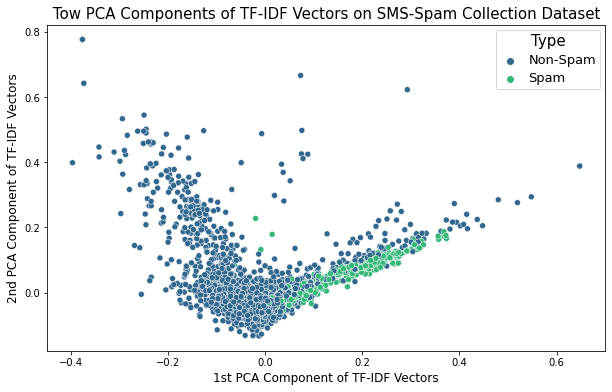

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(" Tow PCA Components of TF-IDF Vectors on SMS-Spam Collection Dataset ", fontdict={"fontsize": 15})
plt.xlabel("1st PCA Component of TF-IDF Vectors", fontdict={"fontsize": 12})
plt.ylabel("2nd PCA Component of TF-IDF Vectors", fontdict={"fontsize": 12})
ax = sns.scatterplot(data=df_pca, x='pca-1', y='pca-2', hue='Type', palette="viridis" , legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='13') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
plt.show()

The above scatter plot gives us some idea that spam and non-spam messages have disticnt properties which have been captured by TF-IDF vectors. We can now proceed to make train-test split of our data and fit it to naive Bayes model. 

## 2.4 Make Train-Test Split of Dataset
We will use 80-20 % train-test split.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)

print("Number of Samples in Train Set = " , X_train.shape[0] )
print("Number of Samples in Test Set  = " , X_test.shape[0]  )

Number of Samples in Train Set =  4135
Number of Samples in Test Set  =  1034


In [ ]:
print('Train Set X ...\n')
X_train

Train Set X ...



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print('Test Set X ...\n')
X_test

Test Set X ...



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 2.5 Fit Multinomial Naive Bayes Model to Train Data

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#fit the training dataset on the Multi-nomial NB classifier
mNB = MultinomialNB() 
mNB.fit(X_train, Y_train)

MultinomialNB()

## 2.6 Perform Inference on Train and Test Set

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

Y_train_pred = mNB.predict(X_train )
Y_test_pred  = mNB.predict(X_test)


print('Inference on Train Set ...')
print("Accuracy  (Train) = ", round(accuracy_score(Y_train_pred, Y_train)*100,2), '%' )
print("Precision (Train) = ", round(precision_score(Y_train_pred, Y_train)*100,2), '%' )
print("Recall    (Train) = ", round(recall_score(Y_train_pred, Y_train)*100,2), '%\n' )

print('Inference on Test Set ...')
print("Accuracy  (Test)  = ", round(accuracy_score(Y_test_pred, Y_test)*100,2), '%' )
print("Precision (Test)  = ", round(precision_score(Y_test_pred, Y_test)*100,2), '%' )
print("Recall    (Test)  = ", round(recall_score(Y_test_pred, Y_test)*100,2), '%' )

Inference on Train Set ...
Accuracy  (Train) =  97.92 %
Precision (Train) =  83.66 %
Recall    (Train) =  99.54 %

Inference on Test Set ...
Accuracy  (Test)  =  97.58 %
Precision (Test)  =  82.01 %
Recall    (Test)  =  100.0 %


## 2.7 Get parameters of the fitted "Multinomial Naive Bayes"
Check the parameters of the fitted multinomial naive Bayes model. Please refer to the sklearn documentation of "Multinomial Naive Bayes" [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Access different atributes of fitted model after reading the documentation, e.g. `mNB.classes_` or `mNB.class_count_`

In [ ]:
print('Classes = ', mNB.classes_)
print('Classe Counts = ', mNB.class_count_) 

Classes =  [0 1]
Classe Counts =  [3621.  514.]


## 2.8 Fit the data to Gaussian Naive Bayes and Bernoulli Naive Bayes and check the performance. Also compare all three models.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB()

### write the code ...

In [ ]:
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()

### write the code ...

### To learn more about Naive Bayes models implemented in sklearn, please refere to [this](https://scikit-learn.org/stable/modules/naive_bayes.html) guide. 



---



---

